
# Import packages and import data (do not change this)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Read the dataset from CSV
data = pd.read_csv('Synapse.csv')


# Function to plot the confusion matrix (do not change this)

In [6]:

def plot_confusion_matrix(cm, classifier_name):
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Function to plot the correlation matrix (do not change this)

In [7]:

def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Feature Correlation Matrix')
    plt.show()


# Function to plot the correlation between features and the response variable (do not change this)

In [8]:

def plot_feature_response_correlation(data, response):
    correlation_matrix = data.corr()[response].sort_values(ascending=False)
    # Drop the response variable to avoid a self-correlation of 1
    correlation_matrix = correlation_matrix.drop(response, axis=0)
    
    sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
    plt.title(f'Correlation with {response} Variable')
    plt.xlabel('Feature')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=90)  # Rotate the feature names for better readability
    plt.show()

# Define the feature set and the target variable (do not change this)

In [9]:
# Here we are asking to drop the featuers named "File" becuase its a text and not useful, and the label Bug because we can not have it amongs the features.
X = data.drop(['File', 'BUG'], axis=1)
# Here we are asking y to be the target variable, what we are trying to predict/ classify.
y = data['BUG']
x_bug = data.drop(['File'], axis=1)


# Here you get to choose which features to include. After runninng the entire code at least once, you can select which fetueres to be included to answer HW2 questions.

In [19]:
# Split the dataset into training and test sets (you can adjust the size of test set here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


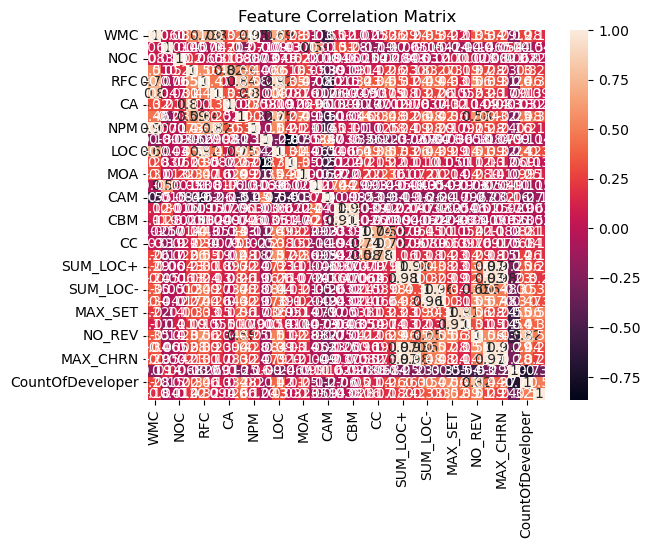

In [11]:
# Plot the correlation matrix for the features only in the dataset 
plot_correlation_matrix(X)

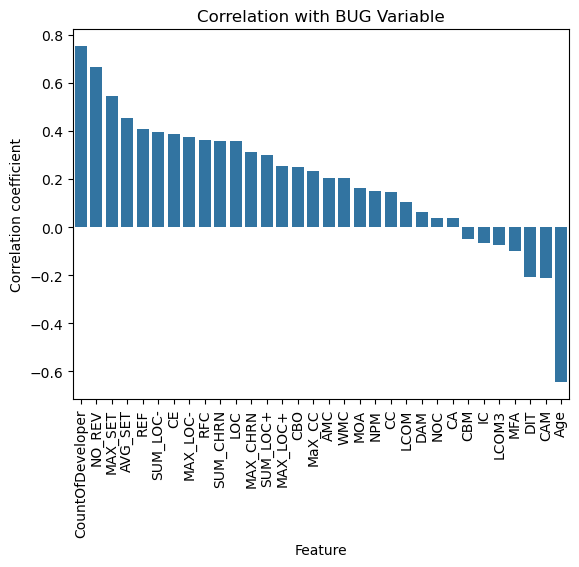

In [12]:

# Add the target variable back for correlation calculation (do not change this)
data_for_correlation = X.copy()
data_for_correlation['BUG'] = y

# Plot the correlation matrix for features and the BUG variable (do not change this)
plot_feature_response_correlation(data_for_correlation, 'BUG')


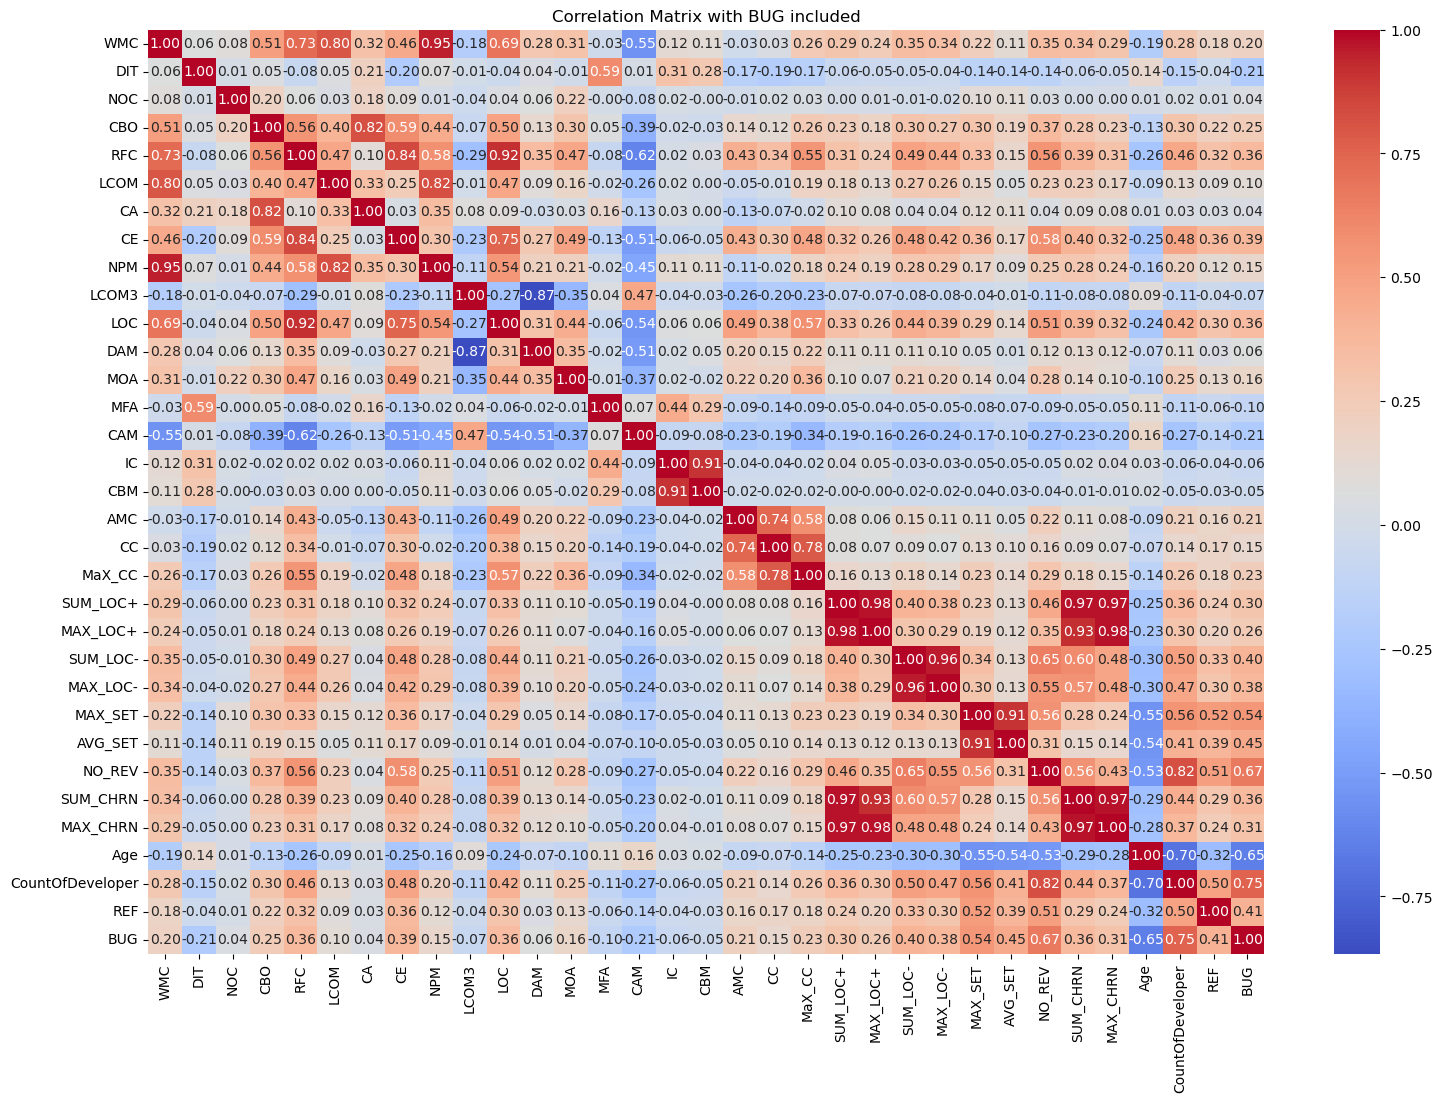

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it includes the 'BUG' column (do not change this)

# Calculate the correlation matrix including all features and the response variable 'BUG'
correlation_matrix = x_bug.corr()

# Plot the correlation matrix
plt.figure(figsize=(18,  12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix with BUG included')
plt.show()


# Define the classifiers (you can uncomment your choicses by removing the # to add to your execution)

In [45]:
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'LogisticRegression': LogisticRegression(max_iter=1000),
    #'SVC': SVC(probability=True, random_state=42),
    #'KNeighbors': KNeighborsClassifier(),
    #'DecisionTree': DecisionTreeClassifier(random_state=42)

}








# Iterate through the classifiers and evaluate each one (do not change this)

In [15]:

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Compute the performance metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Print classifier name and confusion matrix
    print(f"\nClassifier: {name}")
    print(f"Confusion Matrix:\n{cm}")

    # Plot the confusion matrix
    plot_confusion_matrix(cm, name)

    # List all performance metrics
    print(f"Performance Metrics for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"MCC: {mcc:.4f}")


# You may add codes below

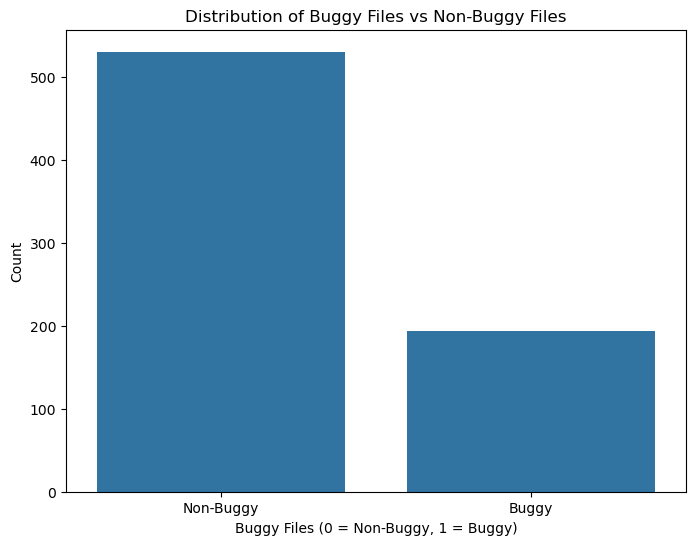

In [49]:
#Question 2 (chart 1): 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='BUG', data=data)

plt.title('Distribution of Buggy Files vs Non-Buggy Files')
plt.xlabel('Buggy Files (0 = Non-Buggy, 1 = Buggy)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Buggy', 'Buggy'])

plt.show()

#Here we have a bar chart that shows the amount of buggy & non buggy files in the dataset


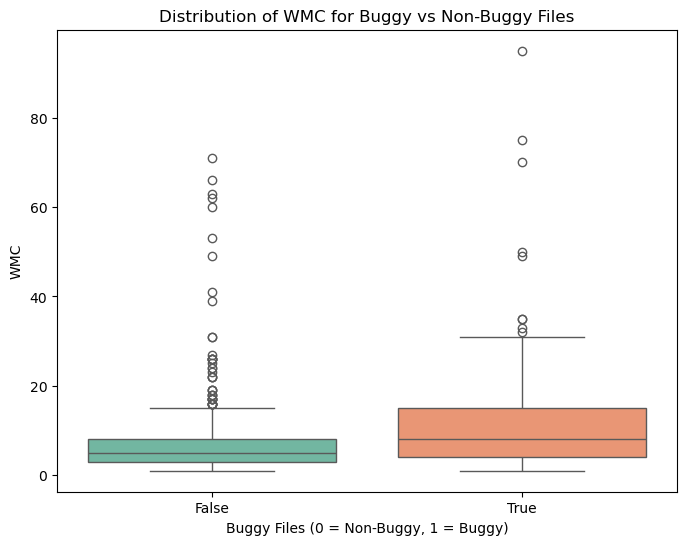

In [55]:
#Question 2 (chart 2): 

plt.figure(figsize=(8, 6))

sns.boxplot(x='BUG', y='WMC', data=data, hue='BUG', palette='Set2', legend=False)

plt.title('Distribution of WMC for Buggy vs Non-Buggy Files')
plt.xlabel('Buggy Files (0 = Non-Buggy, 1 = Buggy)')
plt.ylabel('WMC')

plt.show()

#This chart shows the Weighted Methods per Class districution of buggy and non buggy files 




In [ ]:
#Question 3: 

#The feature with the highest accuracy was "All Features" with 87.59%. 

#A. All features were selected (i.e. ['WMC', 'DIT', 'NOC', 'CBO', 'RFC', 'LCOM', 'CA', 'CE', 'NPM', 'LCOM3', 'LOC', 'DAM', 'MOA', 'MFA', 'CAM', 'IC', 'CBM', 'AMC', 'CC', 'MaX_CC', 'SUM_LOC+', 'MAX_LOC+', 'SUM_LOC-', 'MAX_LOC-', 'MAX_SET', 'AVG_SET', 'NO_REV', 'SUM_CHRN', 'MAX_CHRN', 'Age', 'CountOfDeveloper', 'REF']

#B. All features gave my data set a full analysis of all features that included static and change, creating a well rounded evaluation for predicting software bugs. 

In [ ]:
#Question 4: 

#A. The feature with highest accuracy was Random Forest with All Features. It had 93.79%. 

#B. Again, this shows that using all features tends to be the best way to get a diverse and accurate evaluation to predict buggy files. 


In [ ]:
#Question 5: 

#Out of all the models Random Forest Allfeatures preformed the best

#A. This model can be more complicated to understand, because it is larger it can take longer to train, also because it is larger it can take longer to create a prediction.

#B. Accuracy was chosen because it gives a general overview of balanced data, it is also easy to understand

In [ ]:
#Question 6:

#Features impacts performance of classifications since: 
#All features provide the most data it tends to give the highest accuracy (as stated in our own dataset). 
#Static features tend to be lower as they may not incorporate the strongest data (this did not happen for of Random Forest Data but we do see this for Logistic Regression as it was the lowest number for accuracy) 
#Change features usually perform well (not as great as all features) but still high enough due to it collecting information on this like recent changes and its effect on predicting buggy files. From my data change tended to alwayys do well.
#Selected features (depending on what is chosen) can do well or badly in terms of performance but it all depends on the selection of columns made. There are a wide range of choices that can be made but based on the ones I picked, my accuracy rating were high. 

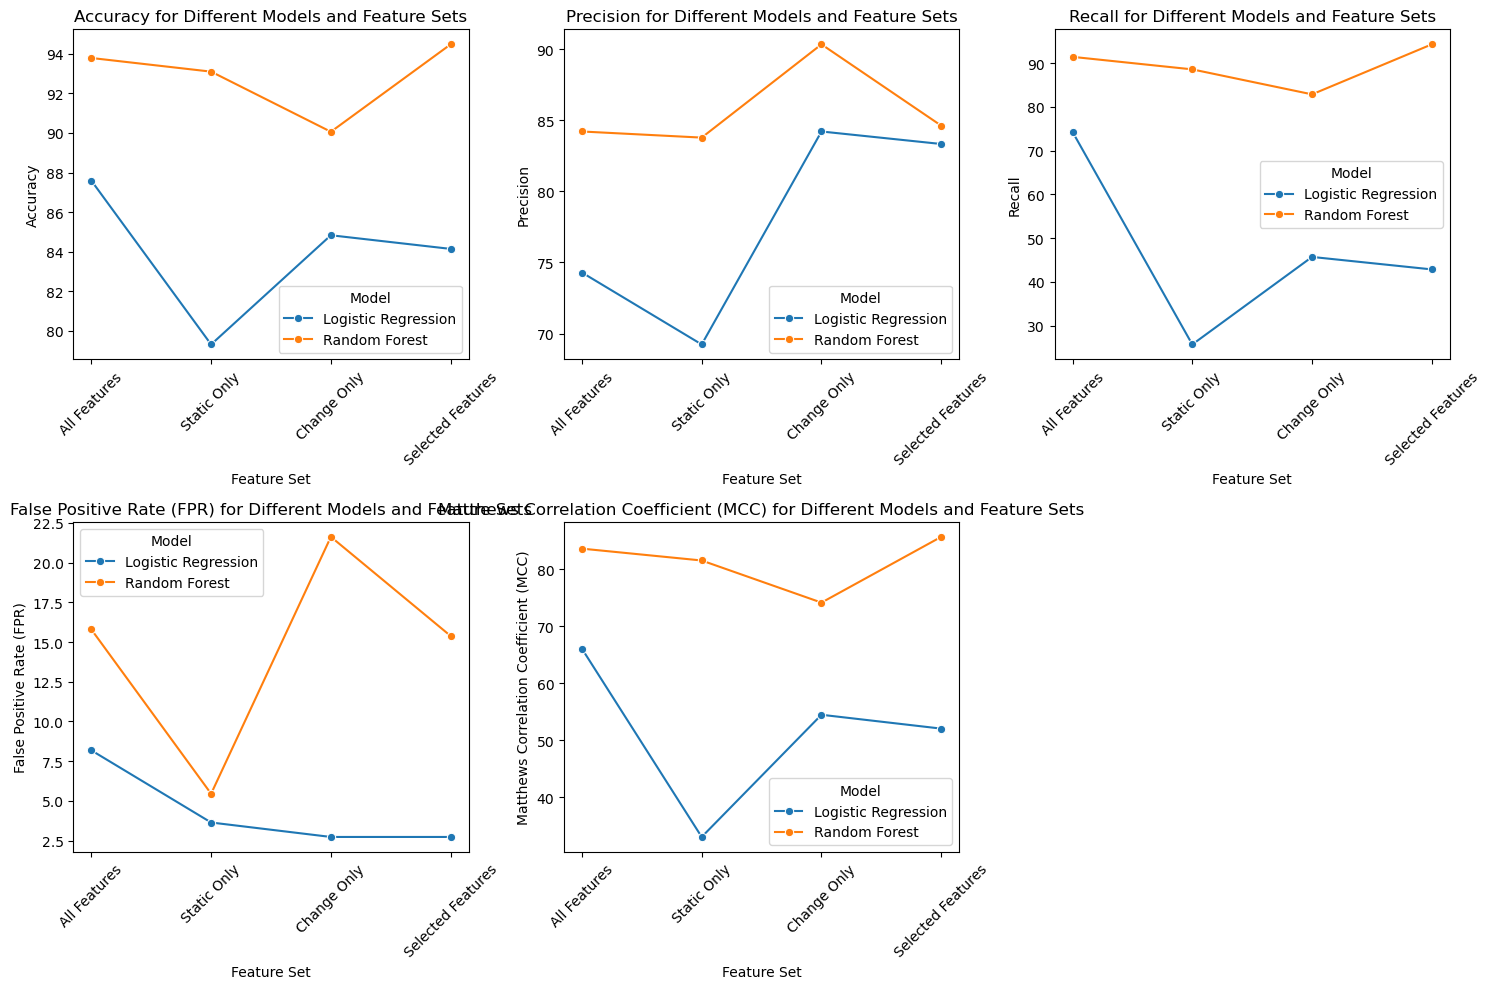

In [59]:
#Bonus 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression',
              'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest'],
    'Feature Set': ['All Features', 'Static Only', 'Change Only', 'Selected Features',
                    'All Features', 'Static Only', 'Change Only', 'Selected Features'],
    'Accuracy': [87.59, 79.31, 84.83, 84.14, 93.79, 93.10, 90.06, 94.48],
    'Precision': [74.29, 69.23, 84.21, 83.33, 84.21, 83.78, 90.34, 84.62],
    'Recall': [74.29, 25.71, 45.71, 42.86, 91.43, 88.57, 82.86, 94.29],
    'FPR': [8.18, 3.64, 2.73, 2.73, 15.79, 5.45, 21.62, 15.38],
    'MCC': [66.10, 33.07, 54.51, 52.08, 83.66, 81.58, 74.19, 85.73]
}


df = pd.DataFrame(data)


metrics = ['Accuracy', 'Precision', 'Recall', 'FPR', 'MCC']
metric_labels = ['Accuracy', 'Precision', 'Recall', 'False Positive Rate (FPR)', 'Matthews Correlation Coefficient (MCC)']


plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(x='Feature Set', y=metric, hue='Model', data=df, marker='o')
    plt.title(f'{metric_labels[i]} for Different Models and Feature Sets')
    plt.xlabel('Feature Set')
    plt.ylabel(metric_labels[i])
    plt.xticks(rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

